$$\frac{dy}{dx} = 0$$

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from edo import EDOModel


model = EDOModel(activations='tanh',hiddens=1,denses=[500])
full_size=10000
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))
x = tf.linspace(0,5,full_size)[:,tf.newaxis]
y = x**2/2
model.fit(x,y,epochs=100,batch_size=int(tf.floor(full_size/10)))

2025-01-04 09:53:55.597414: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-04 09:53:55.628949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-04 09:53:55.640570: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-04 09:53:55.824384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2025-01-04 09:54:01.024052: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-01-04 09:54:01.024138: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: mickael-Aspire-A515-54G
2025-01-04 09:54:01.024147: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: mickael-Aspire-A515-54G
2025-01-04 09:54:01.024251: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: 550.120.0
2025-01-04 09:54:01.024270: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.120.0
2025-01-04 09:54:01.024275: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:249] kernel version seems to match DSO: 550.120.0


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.3829 
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6576
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.4611
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7524
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.4419
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3501
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.3138
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2724
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2339
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2022
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1749
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1499
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1277
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1072
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.0886
Epoch 16/100
10

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step


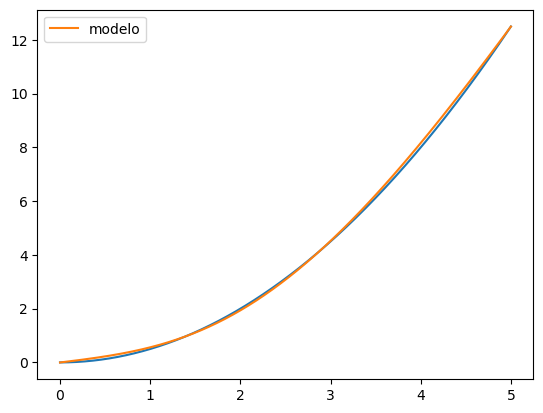

In [2]:
plt.plot(x,y)
plt.plot(x,model.predict(x),label='modelo')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step


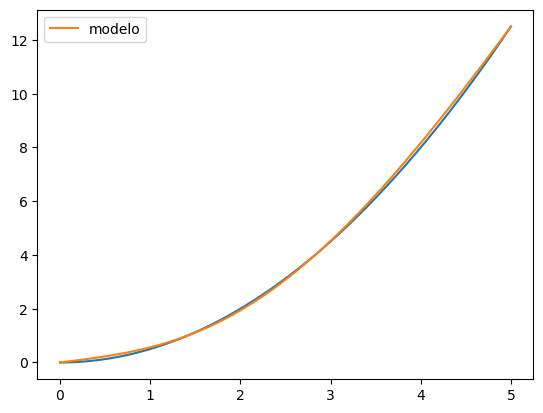

In [3]:
plt.plot(x,y)
plt.plot(x,model.predict(x) +tf.abs(model.predict(x)[0]) ,label='modelo')
plt.legend()